In [144]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from dlomix.losses import masked_spectral_distance, masked_pearson_correlation_distance
from dlomix.data import FragmentIonIntensityDataset

import os

In [174]:
# get files in the directory
run_name = "0.5344_c_r_FiLM_full_d10_static_0.0005_9kK"

subdir = '/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/%s/' % ('c' + run_name.split('_c')[1].split('.keras')[0])

files = [ os.path.join(subdir, file_name) for file_name in os.listdir(subdir) ] 
files.sort(reverse=True)

print('\n'.join(files))

/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5432_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5376_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5344_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5323_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5139_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/c_r_FiLM_full_d10_static_0.0005_9kK/0.5051_c_r_FiLM_full_d10_static_0.0005_9kK.keras
/nfs/home/students/d.lochert/projects/astral/dlomix-astral

In [175]:
# Generate metadata combinations

charges = [
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
]
methods = [
    [1,0],
    [0,1]
]
machines = [
    [1,0,0],
    [0,1,0],
    [0,0,1]
]
energies = [x / 1000.0 for x in range(100, 500, 20)]

# Generate permutations
metadata_permutations = {
    'modified_sequence': [],
    'charge_oh': [],
    'collision_energy': [],
    'method_nr_oh': [],
    'machine_oh': [],
}
for charge in charges:
    for method in methods:
        for machine in machines:
            for energy in energies:
                metadata_permutations['charge_oh'].append(charge)
                metadata_permutations['method_nr_oh'].append(method)
                metadata_permutations['machine_oh'].append(machine)
                metadata_permutations['collision_energy'].append(energy)

for key,value in metadata_permutations.items():
    metadata_permutations[key] = np.array(value)

print(metadata_permutations['charge_oh'].shape)


(720, 6)


In [178]:
# load all models

results = []

for file in files:
    model = keras.saving.load_model(file,
                                    custom_objects={'masked_spectral_distance': masked_spectral_distance, 
                                                    'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                                    compile=True, safe_mode=True)
    results.append(model.get_meta_vector(metadata_permutations))
    print("Finished loading model %s" % file.split('/')[-1])

(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5432_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5376_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5344_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5323_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5139_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5051_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.5001_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.4923_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.4825_c_r_FiLM_full_d10_static_0.0005_9kK.keras
(1024, 30, 512)
(1024, 1, 5120)
Finished loading model 0.4243_c_

In [180]:
for i in results:
    print(i.shape)

(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)
(720, 1, 5120)


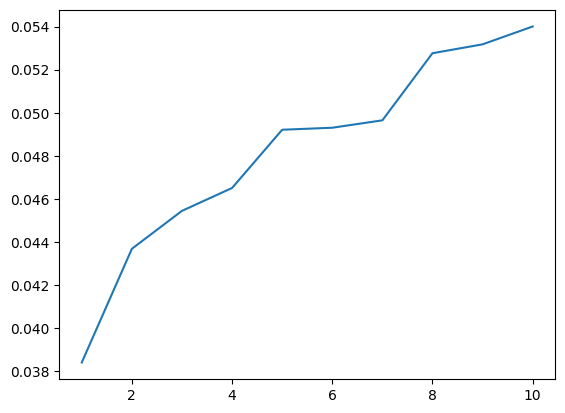

In [222]:
res = tf.split(results[0], 20, axis=-1)

vals = [tf.math.abs(tf.reshape(res[i], [-1])) for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

std = [tf.math.reduce_mean(v) for v in vals]
plt.plot(keys, std)

[(0.7, 0.7, 0.4895833333333333), (0.7, 0.7, 0.5), (0.7, 0.7, 0.5104166666666666), (0.7, 0.7, 0.5208333333333334), (0.7, 0.7, 0.53125), (0.7, 0.7, 0.5416666666666666), (0.7, 0.7, 0.5520833333333334), (0.7, 0.7, 0.5625), (0.7, 0.7, 0.5729166666666666), (0.7, 0.7, 0.5833333333333334), (0.7, 0.7, 0.59375), (0.7, 0.7, 0.6041666666666666), (0.7, 0.7, 0.6145833333333334), (0.7, 0.7, 0.625), (0.7, 0.7, 0.6354166666666666), (0.7, 0.7, 0.6458333333333334), (0.7, 0.7, 0.65625), (0.7, 0.7, 0.6666666666666666), (0.7, 0.7, 0.6770833333333334), (0.7, 0.7, 0.6875), (0.7, 0.7, 0.6979166666666666), (0.7, 0.7, 0.7083333333333334), (0.7, 0.7, 0.71875), (0.7, 0.7, 0.7291666666666666), (0.7, 0.7, 0.7395833333333334), (0.7, 0.7, 0.75), (0.7, 0.7, 0.7604166666666667), (0.7, 0.7, 0.7708333333333333), (0.7, 0.7, 0.78125), (0.7, 0.7, 0.7916666666666667), (0.7, 0.7, 0.8020833333333333), (0.7, 0.7, 0.8125), (0.7, 0.7, 0.8229166666666667), (0.7, 0.7, 0.8333333333333333), (0.7, 0.7, 0.84375), (0.7, 0.7, 0.8541666666

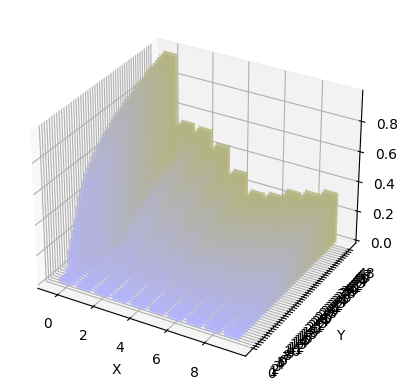

In [237]:
import matplotlib

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = [(.7, .7, (i - 1) / 48.0 * 0.5 + 0.5) for i in range(len(results))]

print(colors)

yticks = list(reversed(list(range(len(results)))   ))

print(yticks)

for color, epoch in zip(colors, yticks):

    res = tf.split(results[epoch], 20, axis=-1)
    vals = [tf.math.abs(tf.reshape(res[i], [-1])) for i in range(0, 20, 2)]
    std = [tf.math.reduce_mean(v) for v in vals]


    xs = np.arange(10)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, std, zs=epoch, color=color, zdir='y', alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]]
[[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.5 -29.5 -29.5 ... -29.5 -29.5 -29.5]
 [-29.  -29.  -29.  ... -29.  -29.  -29. ]
 ...
 [ 28.5  28.5  28.5 ...  28.5  28.5  28.5]
 [ 29.   29.   29.  ...  29.   29.   29. ]
 [ 29.5  29.5  29.5 ...  29.5  29.5  29.5]]
[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.00838

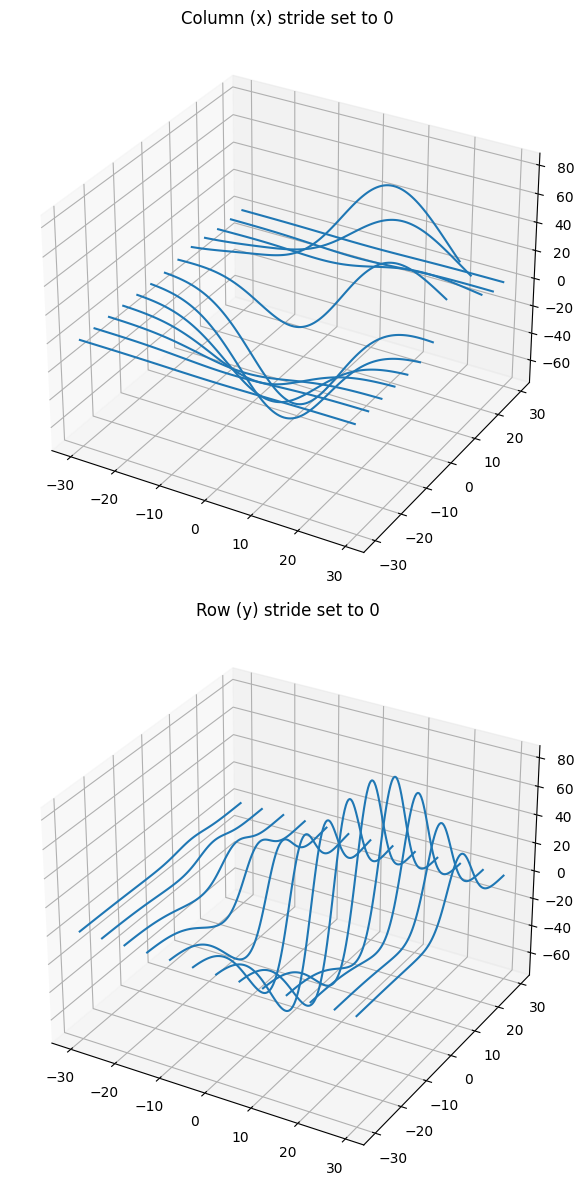

In [243]:
'''
===================================
3D wireframe plots in one direction
===================================

Demonstrates that setting rstride or cstride to 0 causes wires to not be
generated in the corresponding direction.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

X = []
Y  = []
Z  = []


for step in range(len(results)):

    res = tf.split(results[step], 20, axis=-1)
    vals = [tf.math.abs(tf.reshape(res[i], [-1])) for i in range(0, 20, 2)]
    std = [tf.math.reduce_mean(v) for v in vals]

    X.append(list(range(10)))
    Y.append([step] * 10)
    Z.append(std)

    

print(X)
print(Y)
print(Z)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()

In [227]:
model_name = '0.5344_c_r_FiLM_full_d10_static_0.0005_9kK.keras'

subdir = 'c' + model_name.split('_c')[1].split('.keras')[0]

print(subdir)


model = keras.saving.load_model('/nfs/home/students/d.lochert/projects/astral/dlomix-astral/saved_models/%s/%s' % (subdir, model_name),
                                custom_objects={'masked_spectral_distance': masked_spectral_distance, 'masked_pearson_correlation_distance': masked_pearson_correlation_distance}, 
                                compile=True, safe_mode=True)
model.summary()

c_r_FiLM_full_d10_static_0.0005_9kK
(1024, 30, 512)
(1024, 1, 5120)


KeyboardInterrupt: 

In [34]:
int_data = FragmentIonIntensityDataset.load_from_disk("/nfs/home/students/d.lochert/projects/astral/dlomix-astral/combined_dataset")

In [56]:
tmp = [m for m in int_data.tensor_train_data.take(42)][0][0]
tmp

{'modified_sequence': <tf.Tensor: shape=(1024, 30), dtype=int64, numpy=
 array([[ 5,  7,  2, ...,  0,  0,  0],
        [20,  6, 10, ...,  0,  0,  0],
        [20, 18,  4, ...,  0,  0,  0],
        ...,
        [13,  6, 14, ...,  0,  0,  0],
        [13, 16, 14, ...,  0,  0,  0],
        [ 6, 16,  7, ...,  0,  0,  0]])>,
 'charge_oh': <tf.Tensor: shape=(1024, 6), dtype=float32, numpy=
 array([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.]], dtype=float32)>,
 'collision_energy': <tf.Tensor: shape=(1024,), dtype=float32, numpy=array([0.29, 0.29, 0.3 , ..., 0.32, 0.3 , 0.28], dtype=float32)>,
 'method_nr_oh': <tf.Tensor: shape=(1024, 2), dtype=float32, numpy=
 array([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]], dtype=float32)>,
 'machine_oh': <tf.Tensor: shape=(10

In [72]:
print(tmp['collision_energy'].numpy().min())
print(tmp['collision_energy'].numpy().max())

0.18
0.40184155


In [140]:
# Use permutations 

res = model.get_meta_vector(metadata_permutations)
res = tf.split(res, 20, axis=-1)

In [100]:
# Use data from dataset

tmp = [m for m in int_data.tensor_train_data.take(42)][0][0]

res = model.get_meta_vector(tmp)
res = tf.split(res, 20, axis=-1)

RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL _NotOkStatusException REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/site-packages/tensorflow/python/eager/core.py(42): __init__
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/site-packages/tensorflow/python/ops/gen_dataset_ops.py(3024): iterator_get_next
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/site-packages/tensorflow/python/data/ops/iterator_ops.py(773): _next_internal
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/site-packages/tensorflow/python/data/ops/iterator_ops.py(810): __next__
  /tmp/ipykernel_410785/1894031175.py(3): <listcomp>
  /tmp/ipykernel_410785/1894031175.py(3): <module>
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3508): run_code
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3448): run_ast_nodes
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3269): run_cell_async
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3064): _run_cell
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py(3009): run_cell
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py(540): run_cell
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py(422): do_execute
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py(729): execute_request
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py(409): dispatch_shell
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py(502): process_one
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py(513): dispatch_queue
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/asyncio/events.py(80): _run
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/asyncio/base_events.py(1909): _run_once
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/asyncio/base_events.py(603): run_forever
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py(195): start
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py(725): start
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/traitlets/config/application.py(1043): launch_instance
  /nfs/home/students/d.lochert/.local/lib/python3.10/site-packages/ipykernel_launcher.py(17): <module>
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/runpy.py(86): _run_code
  /nfs/home/students/d.lochert/miniconda3/envs/astral/lib/python3.10/runpy.py(196): _run_module_as_main


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8c4c7a3ac0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8c4c7a3970>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8c4c6f3fd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8c4c6f3280>}

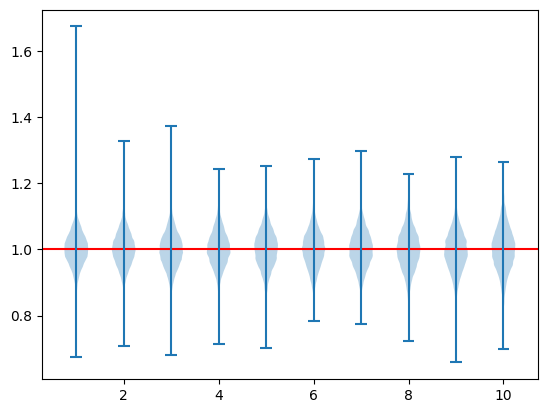

In [141]:
# Plot scaling vector
vals = [tf.reshape(res[i], [-1])+1 for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

plt.axhline(y=1, color='r', linestyle='-')
plt.violinplot(vals, keys) 

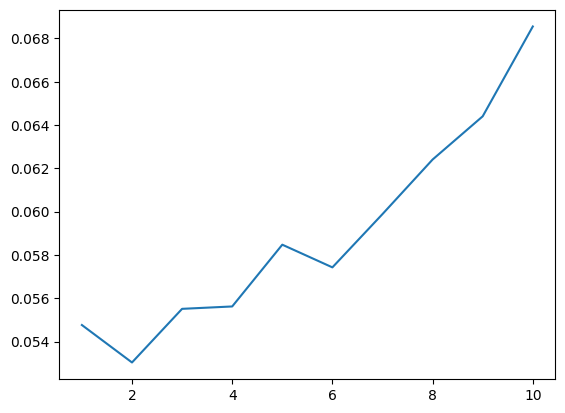

In [142]:
vals = [tf.reshape(res[i], [-1])+1 for i in range(0, 20, 2)]
keys = np.array([i for i in range(1, 11)])

std = [tf.math.reduce_std(v) for v in vals]
plt.plot(keys, std)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8d982c0220>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8d982c08e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8d982c29e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8d982c0be0>}

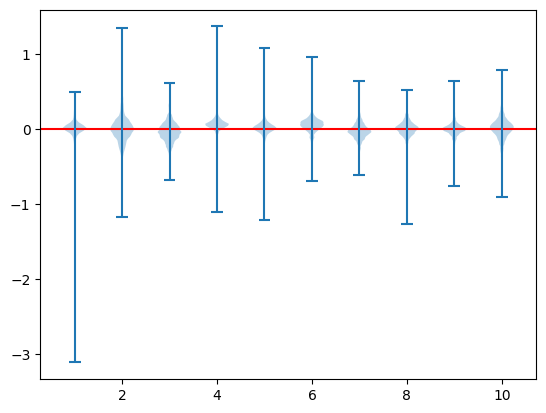

In [49]:
# Plot shift vector
vals = [tf.reshape(res[i], [-1]) for i in range(1, 20, 2)]
keys = np.array([i for i in range(1, 11)])

plt.axhline(y=0, color='r', linestyle='-')
plt.violinplot(vals, keys)

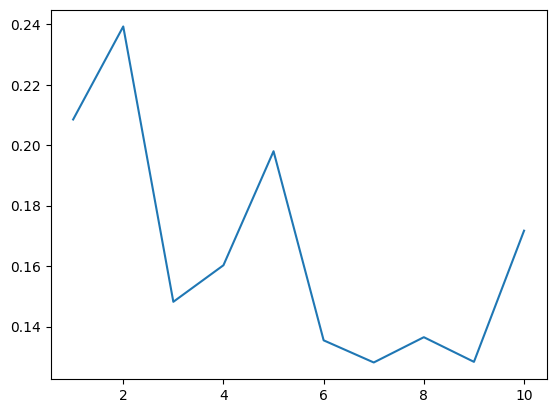

In [52]:
std = [tf.math.reduce_std(v) for v in vals]
plt.plot(keys, std)
